In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
data=pd.read_csv('BankChurners.csv')
data

In [2]:
data.isna().any().sum()

0

In [3]:
data['Income_Category']=data['Income_Category'].replace('$60K - $80K',70)#80+60/2=70
data=data.replace('Less than $40K',20)
data=data.replace('$80K - $120K',100)
data.loc[data['Income_Category']=='$40K - $60K',['Income_Category']]=50
data=data.replace('$120K +',150)
data.Income_Category.unique()

array([70, 20, 100, 50, 150, 'Unknown'], dtype=object)

In [4]:
list=[]
for i in data['Income_Category']:
    if i=='Unknown':
        continue
    list.append(i)
import statistics
statistics.mode(list)

20

In [5]:
data.loc[data['Income_Category']=='Unknown',['Income_Category']]=20
data.Income_Category=data.Income_Category.astype('int')

In [6]:
data=data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [7]:
#to make imbalanced data balanced
a=data.groupby('Attrition_Flag')
b=a.get_group('Attrited Customer')
c=a.get_group('Existing Customer')[:2000]
balanced_data=pd.concat([b,c],ignore_index=True)

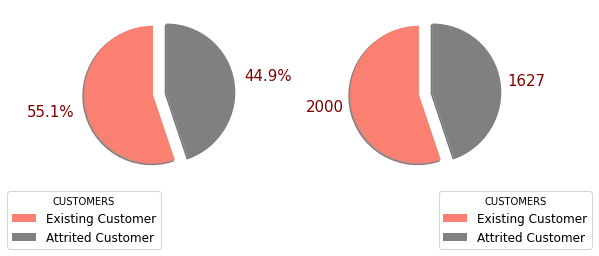

In [8]:
slices=[balanced_data[balanced_data.Attrition_Flag=='Existing Customer']['Attrition_Flag'].count(),balanced_data[balanced_data.Attrition_Flag=='Attrited Customer']['Attrition_Flag'].count()]
x=['Existing Customer','Attrited Customer']
explodes=[0.2,0]
colors=['salmon','grey']
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.pie(balanced_data['Attrition_Flag'].value_counts(),autopct='%1.1f%%', startangle = 90,shadow=True,explode=explodes,colors=colors,textprops = {"fontsize":15,'color':'maroon'},pctdistance=1.5)
plt.legend(title='CUSTOMERS',labels=x,fontsize=12, loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.subplot(1,2,2)
plt.pie(slices,labels=slices,startangle = 90,shadow=True,explode=explodes,colors=colors,textprops = {"fontsize":15,'color':'maroon'},pctdistance=1.5)
plt.legend(title='CUSTOMERS',labels=x,fontsize=12, loc='upper left', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.tight_layout()
plt.show()

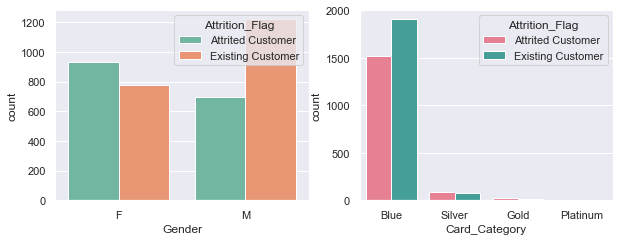

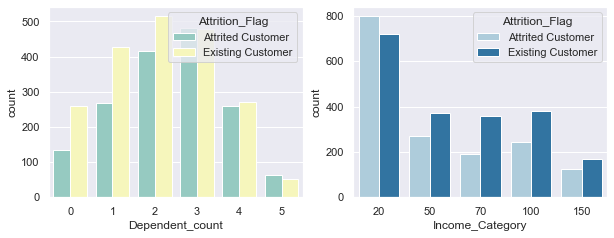

In [9]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10, 3.50))
sns.countplot(x ='Gender', hue = "Attrition_Flag",palette = "Set2", data = balanced_data,ax=ax[0])
sns.countplot(x ='Card_Category', hue = "Attrition_Flag",palette = "husl", data = balanced_data,ax=ax[1])
fig, ax = plt.subplots(1,2,figsize=(10, 3.50))
sns.countplot(x ='Dependent_count', hue = "Attrition_Flag",palette = "Set3", data = balanced_data,ax=ax[0])
sns.countplot(x ='Income_Category', hue = "Attrition_Flag",palette = "Paired", data = balanced_data,ax=ax[1])
plt.show()

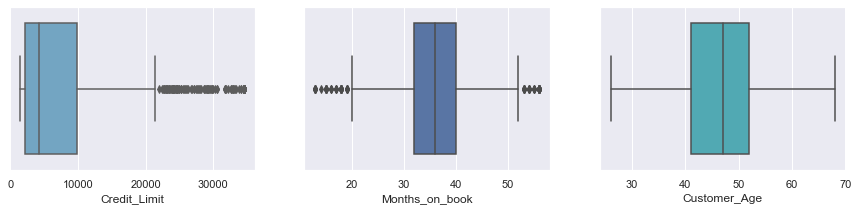

In [10]:
f, axes = plt.subplots(1,3,figsize = (15,3))
b=balanced_data.groupby('Attrition_Flag')
d=b.get_group('Attrited Customer')['Credit_Limit']
sns.set_style("darkgrid")
sns.boxplot(x=d,palette='PuBuGn',ax=axes[0])

m=b.get_group('Attrited Customer')['Months_on_book']
sns.boxplot(x=m,ax=axes[1])

b=balanced_data.groupby(['Attrition_Flag','Card_Category'])
d=b.get_group(('Attrited Customer','Blue'))['Customer_Age']
sns.boxplot(x=d,palette='YlGnBu',ax=axes[2])
plt.show()

<Figure size 288x360 with 0 Axes>

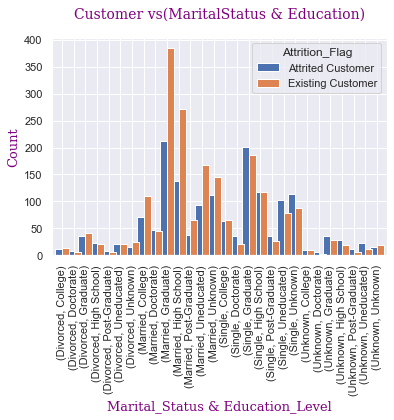

In [11]:
l=pd.crosstab([balanced_data['Marital_Status'],balanced_data['Education_Level']],balanced_data['Attrition_Flag'])
plt.figure(figsize=(4,5))
l.plot.bar(width=1.2)
font={'family':'serif','color':'purple'}
plt.title('Customer vs(MaritalStatus & Education)',fontdict=font,size=14,pad=20)
plt.ylabel('Count',fontdict=font,size=13)
plt.xlabel('Marital_Status & Education_Level',fontdict=font,size=13)
plt.show()

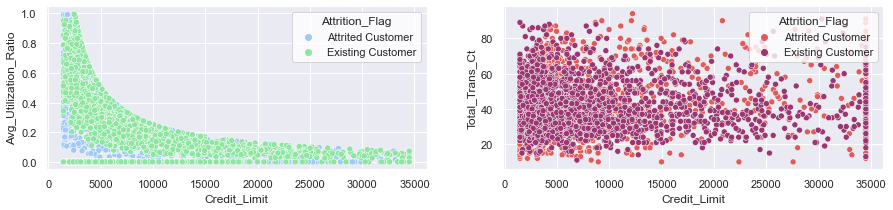

In [12]:
f, axes = plt.subplots(1,2,figsize = (15,3))
sns.set_style("whitegrid")
sns.scatterplot(x='Credit_Limit',y='Avg_Utilization_Ratio',hue='Attrition_Flag',data=balanced_data,palette='pastel6',ax=axes[0])
sns.scatterplot(x='Credit_Limit',y='Total_Trans_Ct',hue='Attrition_Flag',palette='flare',data=balanced_data,ax=axes[1])
plt.show()

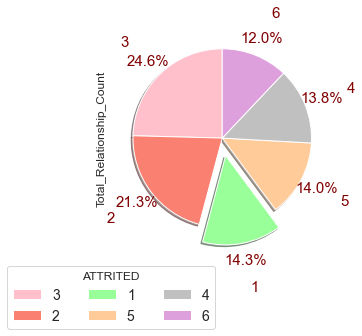

In [13]:
b=balanced_data.groupby('Attrition_Flag')
colors=['pink','salmon','#99ff99','#ffcc99','silver','plum']
plt.figure(figsize=(4,6))
explode=(0,0,0.2,0,0,0)
data=b.get_group('Attrited Customer')['Total_Relationship_Count'].value_counts()
data.plot.pie(autopct='%1.1f%%',colors=colors,textprops = {"fontsize":15,'color':'maroon'},pctdistance=1.2,shadow =True,startangle=90,explode=explode,labeldistance=1.5)
plt.legend(title='ATTRITED',fontsize=14, bbox_to_anchor=(0.5, -0.04), ncol=3)
plt.show()

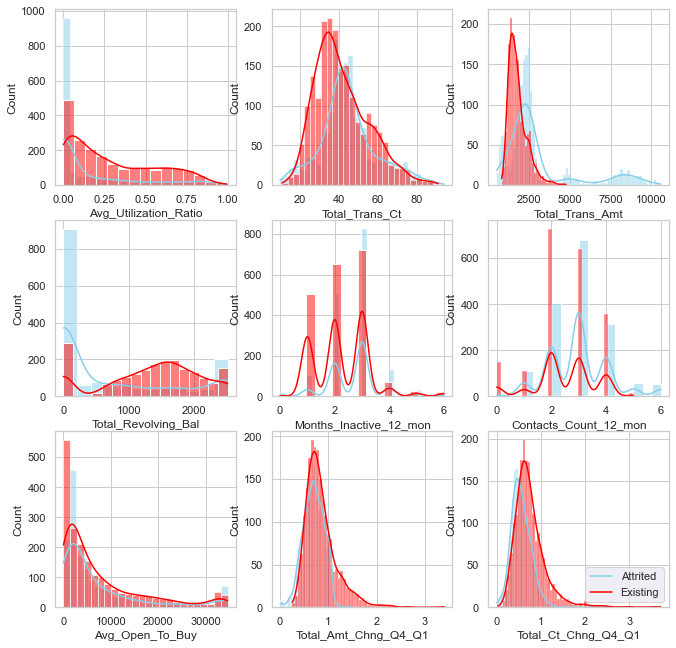

In [14]:
a=balanced_data.groupby('Attrition_Flag')
data=a.get_group('Attrited Customer')
datae=a.get_group('Existing Customer')
f,axes= plt.subplots(3, 3,figsize=(11,11))
sns.set(style="darkgrid")
g=sns.histplot(data, x="Avg_Utilization_Ratio",label='Attrited Customer', color="skyblue",kde=True,ax=axes[0,0])
g=sns.histplot(datae, x="Avg_Utilization_Ratio",label='Existing Customer', color="red", kde=True,ax=axes[0,0])
sns.histplot(data, x="Total_Trans_Ct",label='a',ax=axes[0,1] ,color="skyblue",kde=True)
sns.histplot(datae, x="Total_Trans_Ct",label='Existing Customer',ax=axes[0,1], color="red",kde=True)
sns.histplot(data, x="Total_Trans_Amt", ax=axes[0,2], color="skyblue",kde=True)
sns.histplot(datae, x="Total_Trans_Amt", ax=axes[0,2],label='Existing Customer', color="red",kde=True)
sns.histplot(data, x="Total_Revolving_Bal", ax=axes[1,0],label='Attrited Customer', color="skyblue",kde=True)
sns.histplot(datae, x="Total_Revolving_Bal", ax=axes[1,0], color="red",kde=True)
sns.histplot(data, x="Months_Inactive_12_mon", color="skyblue",kde=True,ax=axes[1,1])
sns.histplot(datae, x="Months_Inactive_12_mon", color="red",kde=True,ax=axes[1,1])
sns.histplot(data, x="Contacts_Count_12_mon", color="skyblue",kde=True,ax=axes[1,2])
sns.histplot(datae, x="Contacts_Count_12_mon", color="red",kde=True,ax=axes[1,2])
sns.histplot(data, x="Avg_Open_To_Buy", color="skyblue",kde=True,ax=axes[2,0])
sns.histplot(datae, x="Avg_Open_To_Buy", color="red",kde=True,ax=axes[2,0])
sns.histplot(data, x="Total_Amt_Chng_Q4_Q1", color="skyblue",kde=True,ax=axes[2,1])
sns.histplot(datae, x="Total_Amt_Chng_Q4_Q1", color="red",kde=True,ax=axes[2,1])
sns.histplot(data, x="Total_Ct_Chng_Q4_Q1", color="skyblue",kde=True,ax=axes[2,2])
sns.histplot(datae, x="Total_Ct_Chng_Q4_Q1", color="red",kde=True,ax=axes[2,2])
plt.legend(labels=['Attrited','Existing'],loc='lower right')
plt.show()

In [15]:
#attrited custormers are 16% of the total customers
#most of the account holders are females
#females attriters are slightly more than male attriters
#attrited custormers are mostly blue card holders
#Blue card holders between age 40 and 50 are greater in no in closing the account compared to other ages
#credit limit is below 5000 for half of the total attrited customers
#the more attrited customers are married graduates or single graduates 
#leaving customers are high in no when their dependency counts are 2 and 3 .
#Most of the attrited customers have income less than $40k
#as credit limit increases Avg_Utilization_Ratio decreases rapidly. 
#total transaction count and credit limit has no relation
#months on book ie period of relationship with the bank for the attrited customers are more in the range 20-40
#Majority of the attrited customers were inactive for 3 months and less
#Total_Relationship_Count ie relationship maintained with the bank, with savings account as well as through other accounts 
# of those leaving is more when Total_Relationship_Count is greater than one
#Three times is the highest no of contacts in the last 12 months of those left and existing customers didnot make contact more than five  times. 

In [16]:
objects=balanced_data.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder
objects=objects.apply(LabelEncoder().fit_transform)

In [17]:
balanced_data=balanced_data.drop(objects.columns,axis=1)

In [18]:
balanced_data=pd.concat([balanced_data,objects],axis=1)
balanced_data

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Gender,Education_Level,Marital_Status,Card_Category
0,708508758,62,0,20,49,2,3,3,1438.3,0,...,1.047,692,16,0.600,0.000,0,0,2,1,0
1,708300483,66,0,20,56,5,4,3,7882.0,605,...,1.052,704,16,0.143,0.077,0,0,1,1,0
2,779471883,54,1,20,40,2,3,1,1438.3,808,...,0.997,705,19,0.900,0.562,0,0,2,1,0
3,714374133,56,2,150,36,1,3,3,15769.0,0,...,1.041,602,15,0.364,0.000,0,1,2,1,0
4,712030833,48,2,70,35,2,4,4,34516.0,0,...,0.763,691,15,0.500,0.000,0,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,771756333,34,3,20,23,5,3,3,2263.0,1794,...,0.794,2154,37,0.542,0.793,1,0,2,1,0
3623,779895108,39,3,100,23,6,1,4,2718.0,2156,...,0.668,1711,36,0.440,0.793,1,1,6,2,0
3624,771976683,54,1,20,43,3,3,2,5839.0,2130,...,0.687,1640,44,0.333,0.365,1,0,0,1,0
3625,716800908,26,2,20,13,5,0,3,5137.0,0,...,0.699,2496,49,0.581,0.000,1,0,3,2,0


In [19]:
# from sklearn.preprocessing import StandardScaler
# k=StandardScaler()
# b=balanced_data.drop('Attrition_Flag',axis=1)
# new=k.fit_transform(b)
# balanced_data=pd.DataFrame(new,columns=b.columns)

In [20]:
corr=balanced_data.corr()
corr

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Gender,Education_Level,Marital_Status,Card_Category
CLIENTNUM,1.000000,0.035974,0.000422,0.060544,0.142583,0.046202,0.032449,0.007973,0.027622,0.032955,...,0.028924,-0.095084,-0.044296,-0.002794,0.007532,0.070429,0.047113,-0.018721,0.013428,0.025597
Customer_Age,0.035974,1.000000,-0.088259,0.040678,0.803202,-0.059712,0.104737,-0.048320,0.024823,0.026485,...,-0.032239,-0.099057,-0.181876,0.013080,-0.002991,-0.047143,-0.025331,0.010097,-0.052208,-0.002444
Dependent_count,0.000422,-0.088259,1.000000,0.087195,-0.083752,-0.053287,-0.006386,-0.024937,0.111993,-0.005297,...,-0.057897,0.004305,-0.038831,-0.012368,-0.089526,-0.109953,0.001615,0.011119,0.014603,0.034879
Income_Category,0.060544,0.040678,0.087195,1.000000,0.018229,-0.002009,-0.014131,-0.048568,0.511391,0.066609,...,0.027945,0.018076,-0.013119,0.042874,-0.208399,0.097318,0.737625,-0.007115,-0.000075,0.054238
Months_on_book,0.142583,0.803202,-0.083752,0.018229,1.000000,-0.042792,0.148210,-0.027835,0.016119,0.023220,...,-0.031103,-0.084813,-0.134856,-0.000599,-0.006832,-0.035075,-0.016602,-0.009025,-0.039579,-0.013155
Total_Relationship_Count,0.046202,-0.059712,-0.053287,-0.002009,-0.042792,1.000000,-0.110484,-0.077846,-0.013548,0.144598,...,0.093054,-0.164701,-0.015292,0.109180,0.106654,0.401120,0.027318,0.011885,-0.047289,-0.035247
Months_Inactive_12_mon,0.032449,0.104737,-0.006386,-0.014131,0.148210,-0.110484,1.000000,0.066315,-0.012339,-0.080670,...,-0.078081,0.082115,0.049329,-0.061203,-0.056023,-0.223436,-0.014204,-0.019191,0.012899,-0.007517
Contacts_Count_12_mon,0.007973,-0.048320,-0.024937,-0.048568,-0.027835,-0.077846,0.066315,1.000000,-0.031084,-0.112035,...,-0.112698,0.104784,0.117080,-0.107606,-0.051075,-0.212316,-0.040491,0.003509,0.006871,-0.000683
Credit_Limit,0.027622,0.024823,0.111993,0.511391,0.016119,-0.013548,-0.012339,-0.031084,1.000000,0.038922,...,0.026379,0.131961,0.078972,0.066789,-0.409296,0.051559,0.377190,-0.002653,0.056448,0.447938
Total_Revolving_Bal,0.032955,0.026485,-0.005297,0.066609,0.023220,0.144598,-0.080670,-0.112035,0.038922,1.000000,...,0.116860,-0.134972,-0.082368,0.151366,0.680563,0.383390,0.077183,-0.012166,-0.073105,-0.015642


C:\Users\Aparna\AppData\Local\Temp\ipykernel_8232\2433325159.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


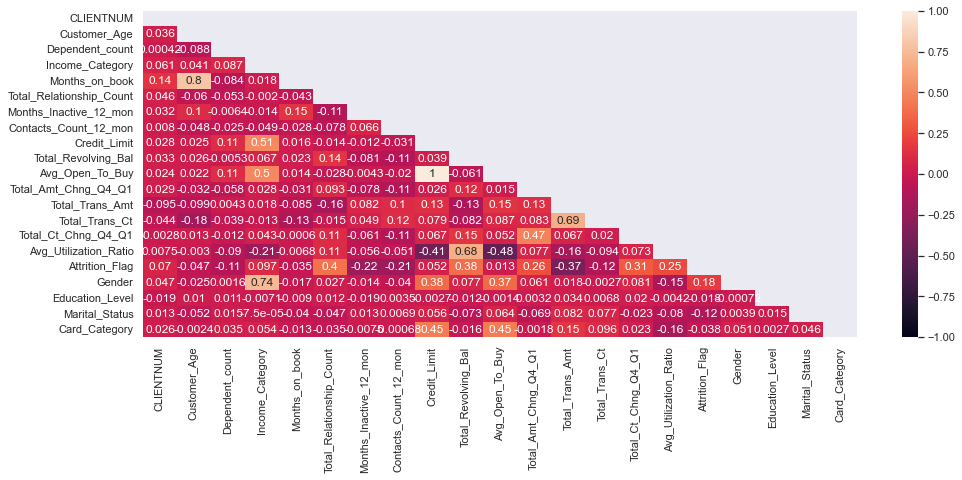

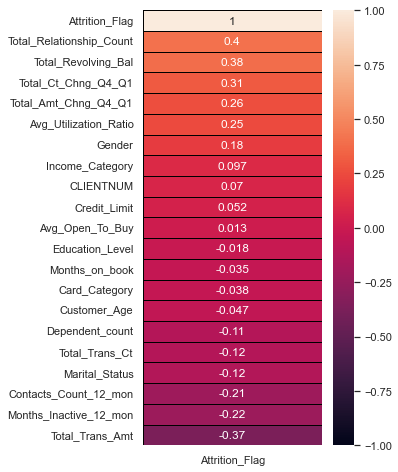

In [21]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# plt.cm.CMRmap_r
# cmap='magma'/'viridis'/'cubehelix'
heatmap=sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,annot=True)

# plt.subplots(figsize=(15,15))
# sns.heatmap(corr, xticklabels=True,yticklabels=True, vmin=0, vmax=1,
#  cmap='viridis',square=True)
fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(corr[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False),vmin=-1, vmax=1, linewidths=1, linecolor='black', annot=True);


In [22]:
#checking multicollinearity
b=corr.columns
columns_discard=[]
for i in  b:
    for j in b:
        if 1>corr.loc[i,j]>.7:
         print(i,j,corr.loc[i,j])
         if i not in columns_discard:
           columns_discard.append(i)
columns_discard

Customer_Age Months_on_book 0.8032021146485859
Income_Category Gender 0.7376252857332143
Months_on_book Customer_Age 0.8032021146485859
Credit_Limit Avg_Open_To_Buy 0.9950276652173575
Avg_Open_To_Buy Credit_Limit 0.9950276652173575
Gender Income_Category 0.7376252857332143


['Customer_Age',
 'Income_Category',
 'Months_on_book',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Gender']

In [23]:
newdata=[]
for i in range(len(corr.Attrition_Flag)):
  if abs(corr.Attrition_Flag[i])<.2 and corr.Attrition_Flag[i]!=1 :
    newdata.append(corr.index[i])
newdata

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Income_Category',
 'Months_on_book',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Trans_Ct',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Card_Category']

In [24]:
balanced_data=balanced_data.drop(newdata,axis=1)

In [25]:
balanced_data

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,2,3,3,0,1.047,692,0.600,0.000,0
1,5,4,3,605,1.052,704,0.143,0.077,0
2,2,3,1,808,0.997,705,0.900,0.562,0
3,1,3,3,0,1.041,602,0.364,0.000,0
4,2,4,4,0,0.763,691,0.500,0.000,0
...,...,...,...,...,...,...,...,...,...
3622,5,3,3,1794,0.794,2154,0.542,0.793,1
3623,6,1,4,2156,0.668,1711,0.440,0.793,1
3624,3,3,2,2130,0.687,1640,0.333,0.365,1
3625,5,0,3,0,0.699,2496,0.581,0.000,1


In [26]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# !pip install xgboost
# from xgboost import XGBClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score

In [28]:
x=balanced_data.drop('Attrition_Flag',axis=1)
y=balanced_data.Attrition_Flag
models={'logistic':{'model':LogisticRegression()},'random_forest':{'model':RandomForestClassifier()},'decision_tree':{'model':DecisionTreeClassifier()},'Gaussian':{'model':GaussianNB()},'KNN':{'model':KNeighborsClassifier()},'XGBClassifier':{'model':XGBClassifier()},'svm':{'model':SVC()}}
list=[]
for k,v in models.items():
 score=cross_val_score(v['model'],x,y,cv=5)
 s=score.mean()
 l={'model':v['model'],'score':s}
 list.append(l)
list
data_frame=pd.DataFrame(list)
data_frame

C:\Users\Aparna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aparna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,score
0,LogisticRegression(),0.792401
1,RandomForestClassifier(),0.854985
2,DecisionTreeClassifier(),0.768113
3,GaussianNB(),0.799824
4,KNeighborsClassifier(),0.669955
5,"XGBClassifier(base_score=None, booster=None, c...",0.849736
6,SVC(),0.716031


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)
f=RandomForestClassifier()
f.fit(x_train,y_train)
new=f.predict(x_test)
cm=confusion_matrix(y_test,new)
print(classification_report(y_test,new))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       332
           1       0.92      0.93      0.92       394

    accuracy                           0.92       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.92      0.92      0.92       726



In [30]:
model=XGBClassifier()
model.fit(x_train,y_train)
new=model.predict(x_test)
cm=confusion_matrix(y_test,new)
print(classification_report(y_test,new))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       332
           1       0.90      0.94      0.92       394

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.91      0.91      0.91       726



C:\Users\Aparna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Basic Logicistic Regression Model With Default Parameters:  0.8140495867768595
Decision Tree Classifier Model With Default Parameters:  0.859504132231405
Basic Random Forest Classifier Model With Default Parameters:  0.9118457300275482
KNeighbours Model With Default Parameters:  0.7988980716253442
XGB Model With Default Parameters:  0.9104683195592287
svc Model With Default Parameters:  0.7575757575757576


Text(0.5, 1.0, 'MODEL COMPARISON OF F1 SCORE')

<Figure size 864x576 with 0 Axes>

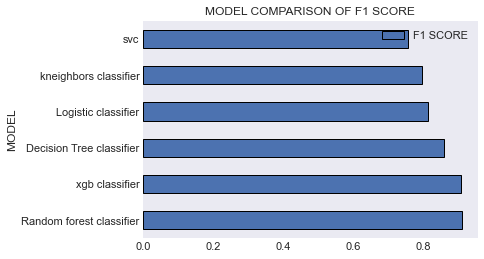

In [32]:
def check_model_f1_score(model):
 model.fit(x_train, y_train)
 test_y_pred = model.predict(x_test)
 return f1_score(y_test, test_y_pred, average='micro')
lr=LogisticRegression()
dc=DecisionTreeClassifier()
rc=RandomForestClassifier()
knc=KNeighborsClassifier()
xg=XGBClassifier()
svc=SVC()
lr_score = check_model_f1_score(lr)
dc_score = check_model_f1_score(dc)
rc_score = check_model_f1_score(rc)
knc_score = check_model_f1_score(knc)
xg_score = check_model_f1_score(xg)
svc_score = check_model_f1_score(svc)
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
model_comparison = pd.DataFrame({'MODEL':['Logistic classifier','Decision Tree classifier', 'Random forest classifier', 'kneighbors classifier','xgb classifier','svc'], 'F1 SCORE':[lr_score,dc_score,rc_score,knc_score,xg_score,svc_score]})
plt.style.use("seaborn-dark")
model_comparison.sort_values('F1 SCORE', ascending = False).plot(x = 'MODEL', y = 'F1 SCORE', kind = 'barh', edgecolor = 'black')
plt.title('MODEL COMPARISON OF F1 SCORE')

C:\Users\Aparna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'MODEL COMPARISON OF ACCURACY')

<Figure size 864x576 with 0 Axes>

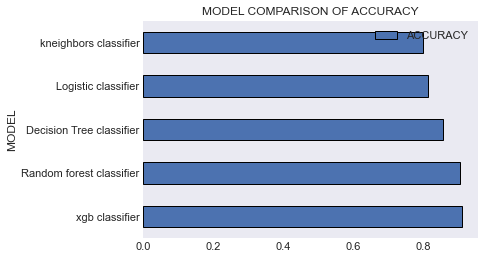

In [34]:
def check_model_accuracy(model):
 model.fit(x_train, y_train)
 test_y_pred = model.predict(x_test)
 return accuracy_score(y_test, test_y_pred)
lr_score = check_model_accuracy(lr)
dc_score = check_model_accuracy(dc)
rc_score = check_model_accuracy(rc)
knc_score = check_model_accuracy(knc)
xg_score = check_model_accuracy(xg)
plt.figure(figsize=(12,8))
model_comparison = pd.DataFrame({'MODEL':['Logistic classifier','Decision Tree classifier','Random forest classifier', 'kneighbors classifier','xgb classifier'], 'ACCURACY':[lr_score,dc_score,rc_score,knc_score,xg_score]})
plt.style.use("seaborn-dark")
model_comparison.sort_values('ACCURACY', ascending = False).plot(x = 'MODEL', y = 'ACCURACY', kind= 'barh', edgecolor = 'black')
plt.title('MODEL COMPARISON OF ACCURACY')

In [35]:
models_tuned={'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}},'XGBClassifier':{'model':XGBClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}}}

In [37]:
list2=[]
for k,v in models_tuned.items():
    k=v['model']
    clf=GridSearchCV(k,param_grid=v['params'])
    clf.fit(x,y)
    print(k,':',clf.best_score_)
    l={'model':v['model'],'best_params':clf.best_params_,' best_score':clf.best_score_}
    list2.append(l)
score_dataframe=pd.DataFrame(list2)
score_dataframe

RandomForestClassifier() : 0.8574651847629904
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 0.8530456920300182


,model,best_params,best_score
0,RandomForestClassifier(),{'n_estimators': 46},0.857465
1,"XGBClassifier(base_score=None, booster=None, c...",{'n_estimators': 41},0.853046


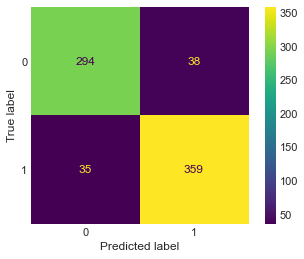

In [38]:
model1_tuned=RandomForestClassifier(n_estimators=46)
model1_tuned.fit(x_train,y_train)
model1_pred=model1_tuned.predict(x_test)
cm=confusion_matrix(y_test,model1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_test,model1_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       332
           1       0.90      0.91      0.91       394

    accuracy                           0.90       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.90      0.90      0.90       726



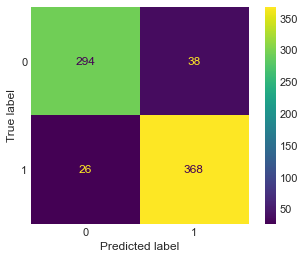

In [40]:
model2_tuned=XGBClassifier(n_estimators=41)
model2_tuned.fit(x_train,y_train)
model2_pred=model2_tuned.predict(x_test)
cm=confusion_matrix(y_test,model2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

In [41]:
print(classification_report(y_test,model2_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       332
           1       0.91      0.93      0.92       394

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.91      0.91      0.91       726



In [42]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# !pip install xgboost
# from xgboost import XGBClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# models={'logistic':{'model':LogisticRegression(),'params':{}},'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}},'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},'Gaussian':{'model':GaussianNB(),'params':{}},'KNN':{'model':KNeighborsClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}},'XGBClassifier':{'model':XGBClassifier(),'params':{'n_estimators':[int(x) for x in np.linspace(1,100,100)]}}}

In [43]:
# x=balanced_data.drop('Attrition_Flag',axis=1)
# y=balanced_data.Attrition_Flag
# list=[]
# for k,v in models.items():
#     k=v['model']
#     clf=GridSearchCV(k,param_grid=v['params'])
#     clf.fit(x,y)
#     print(k,':',clf.best_score_)
#     l={'model':v['model'],'best_params':clf.best_params_,' best_score':clf.best_score_}
#     list.append(l)
# data2=pd.DataFrame(list)
# data2

In [ ]:
#sometimes we need precision more sometimes recall more if both needed to be high we check f1score